In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
expected = pd.read_csv(
        "/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/BD7_Thermo_Pool52_HCD/Thermo_SRM_Pool_52_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
        sep='\t')
count_spectra = expected.shape[0]
print("amount expected spectra:", count_spectra)
count_identified = expected.query("Identified == '+'").shape[0]
print("amount idenfied spectra:",count_identified )

amount expected spectra: 49044
amount idenfied spectra: 31605


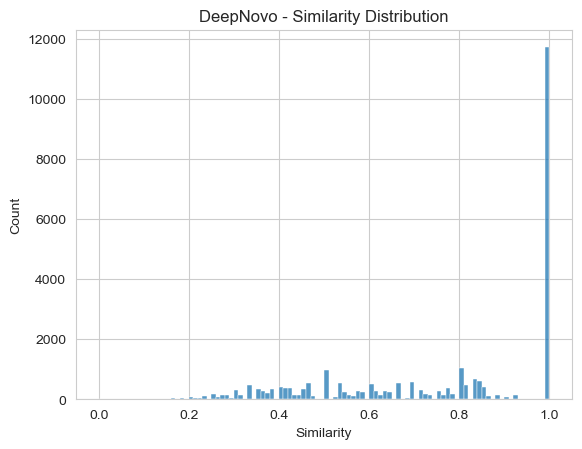

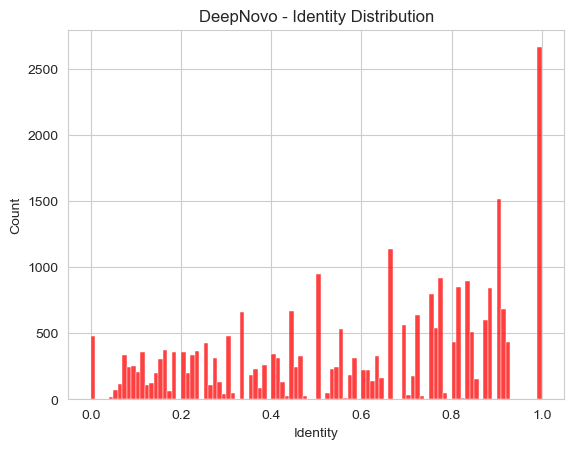

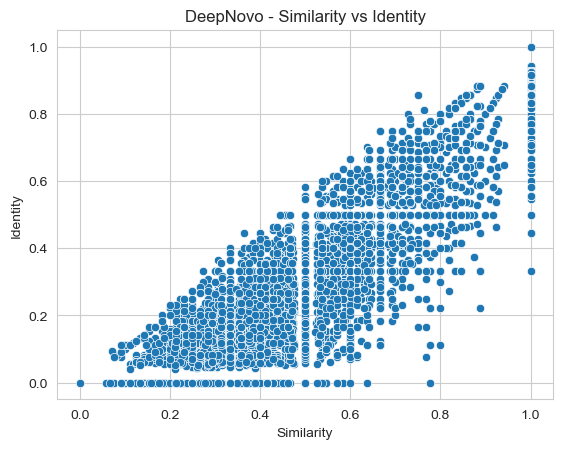

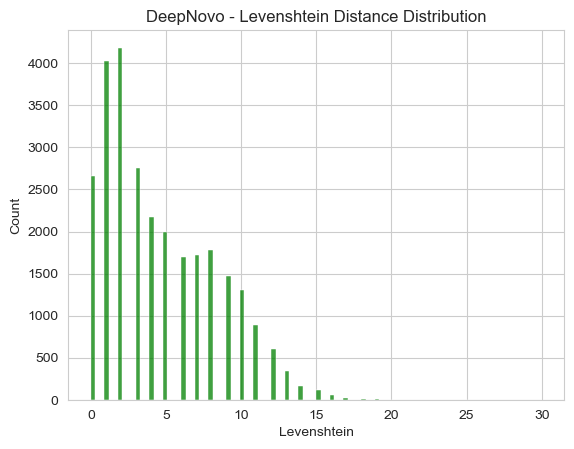

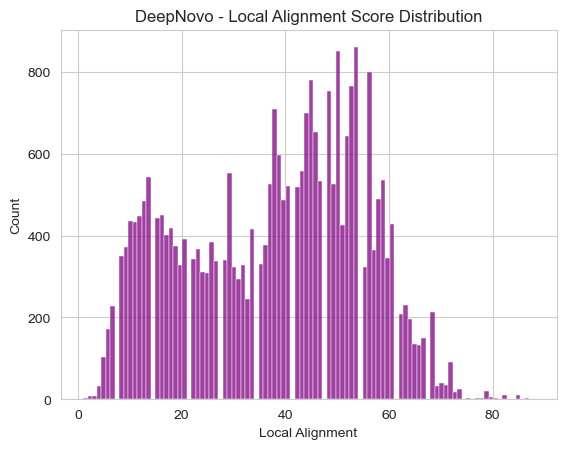

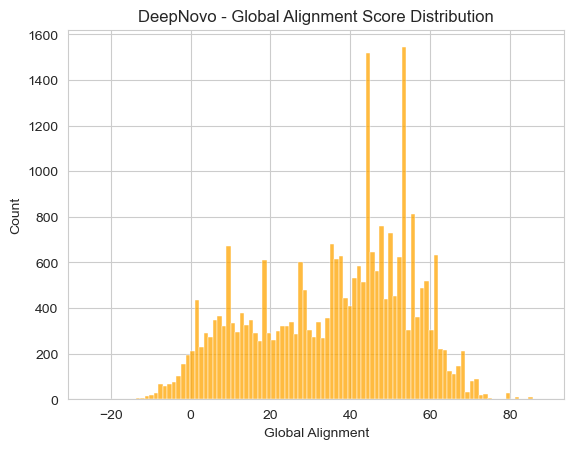

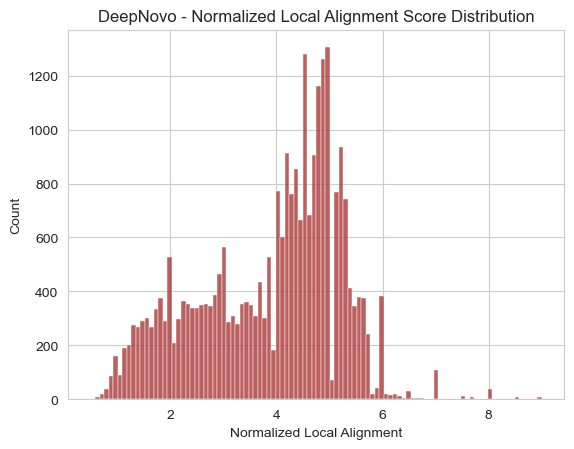

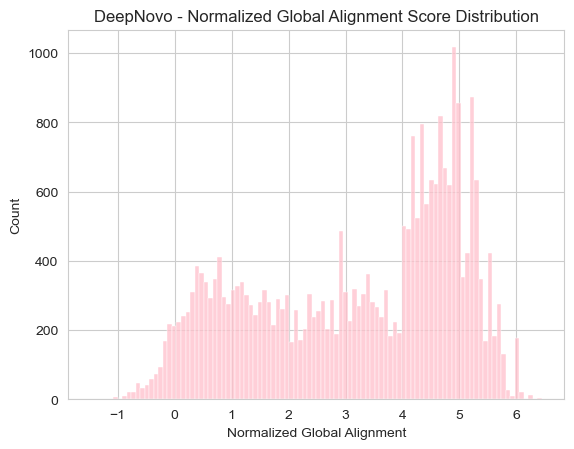

Algorithm: DeepNovo
100% similarity: 11728
100% identity: 2662
0 levenshtein: 2662
total count: 27960 



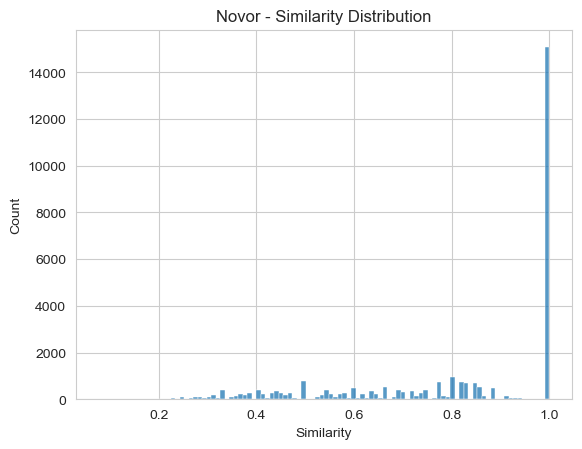

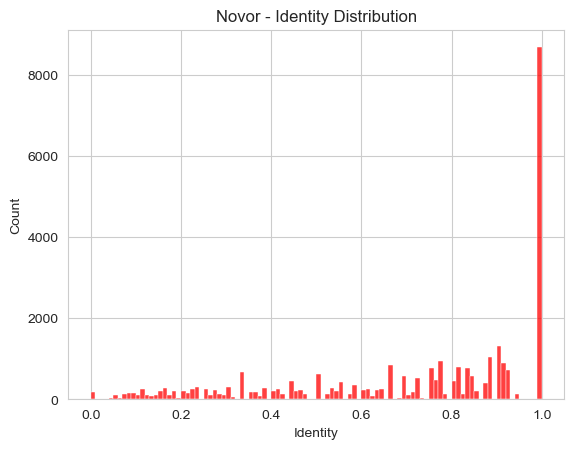

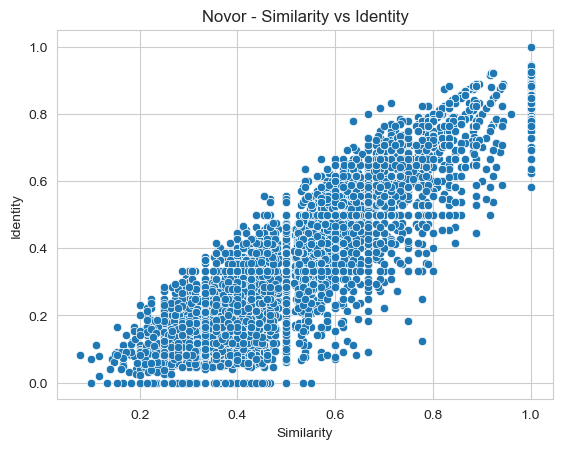

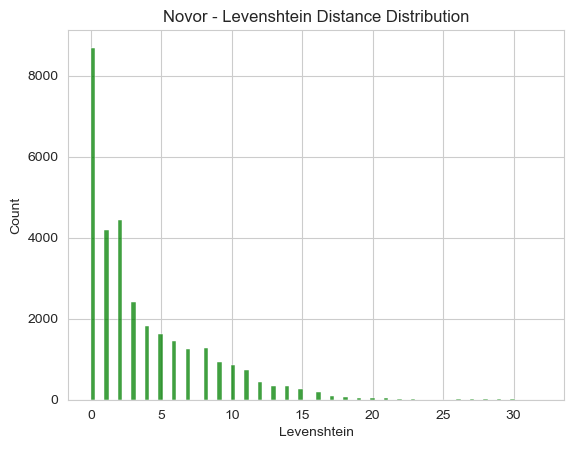

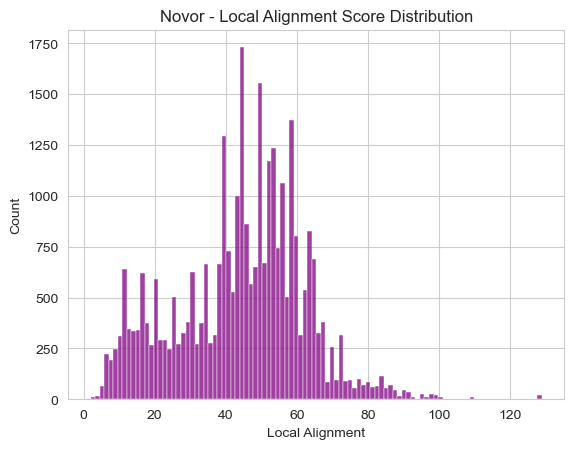

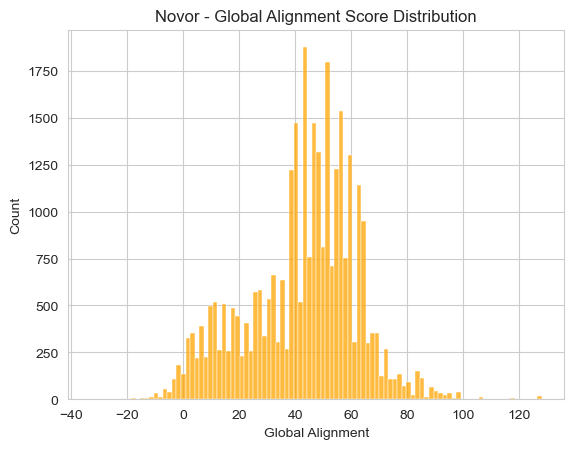

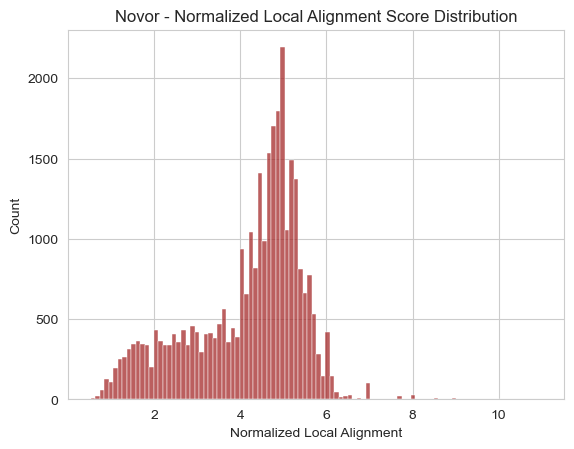

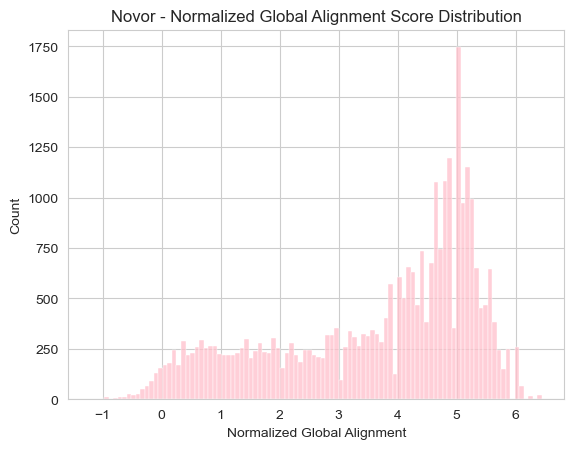

Algorithm: Novor
100% similarity: 15073
100% identity: 8689
0 levenshtein: 8689
total count: 31591 



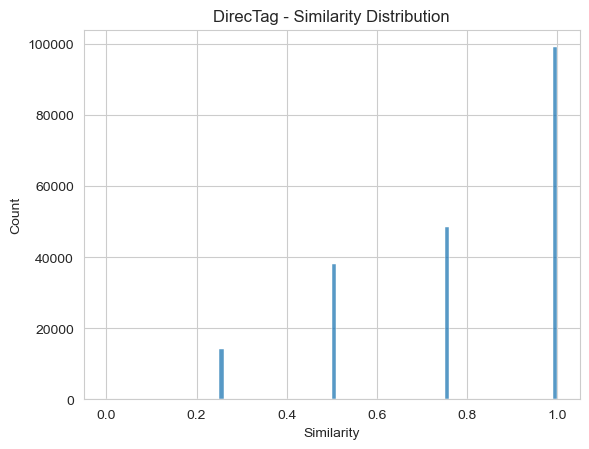

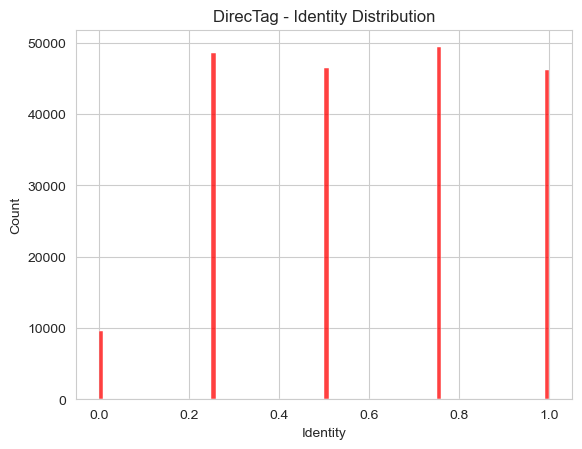

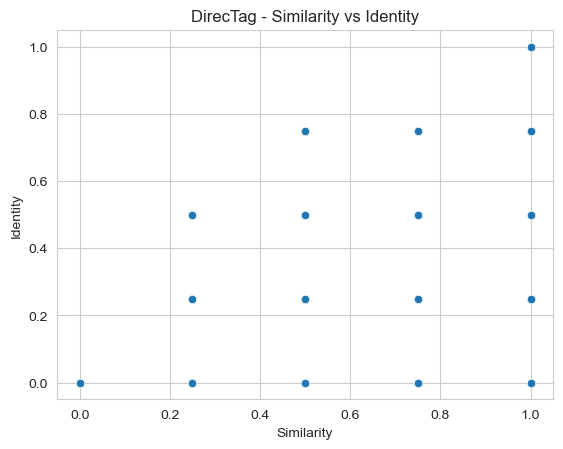

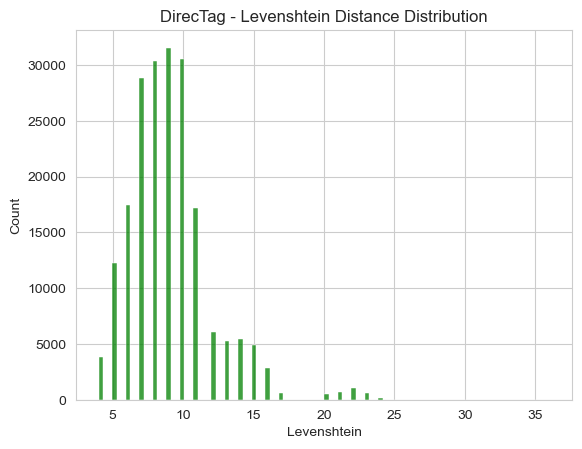

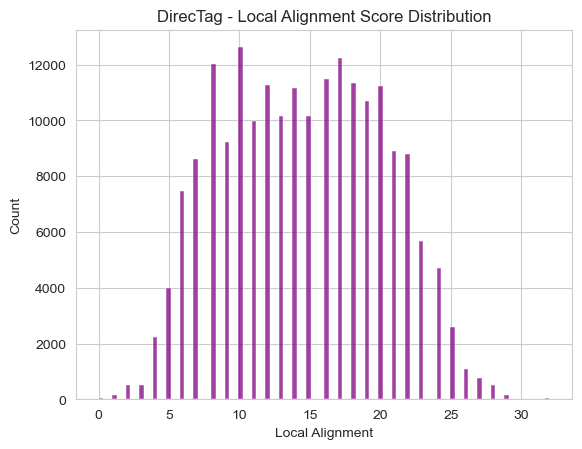

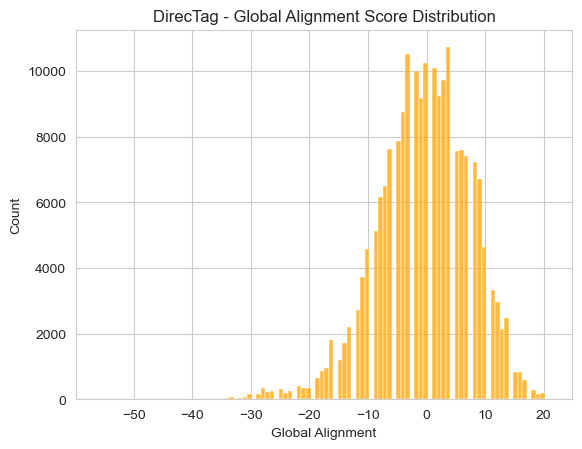

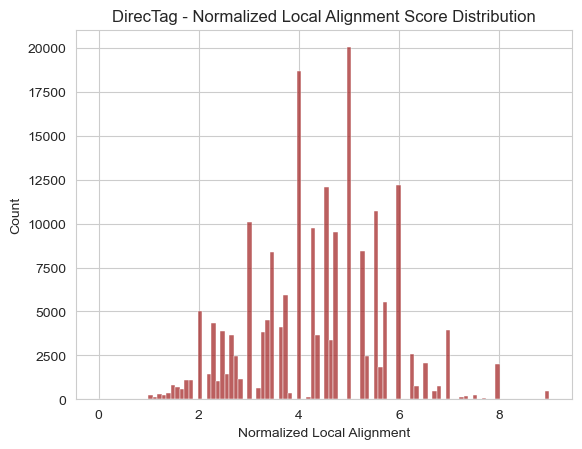

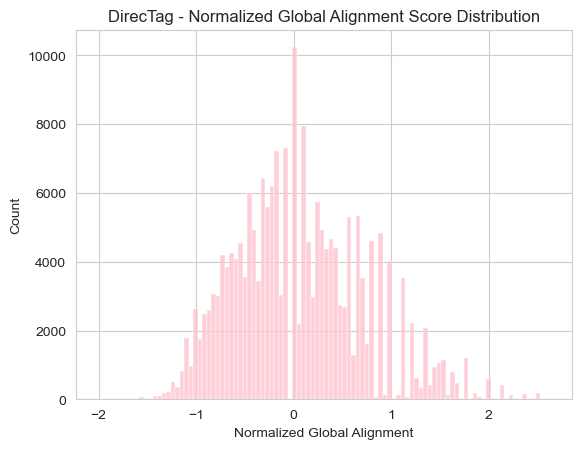

Algorithm: DirecTag
100% similarity: 99147
100% identity: 46235
0 levenshtein: 0
total count: 200238 



In [3]:
algorithms = ['DeepNovo', 'Novor', 'DirecTag']
for alg in algorithms:
    # read dataset
    data = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_{alg}_1.tsv', sep='\t', index_col=0)

    # plot similarity distribution
    plt.figure()
    similarity_pt = sns.histplot(data['Similarity'], bins=100)
    similarity_pt.set_title(f'{alg} - Similarity Distribution')
    plt.show()

    # plot identity distribution
    plt.figure()
    identity_plt =sns.histplot(data['Identity'], bins=100, color='red')
    identity_plt.set_title(f'{alg} - Identity Distribution')
    plt.show()

    # plot similarity vs identity
    plt.figure()
    sns.scatterplot(data=data, x='Similarity', y='Identity')
    plt.title(f'{alg} - Similarity vs Identity')
    plt.show()

    # plot levenstein distance distribution
    if 'Levenshtein' in data.columns:
        plt.figure()
        sns.histplot(data['Levenshtein'], bins=100, color='green')
        plt.title(f'{alg} - Levenshtein Distance Distribution')
        plt.show()

    # plot local alignment score distribution
    plt.figure()
    sns.histplot(data['Local Alignment'], bins=100, color='purple')
    plt.title(f'{alg} - Local Alignment Score Distribution')
    plt.show()

    # plot global alignment score distribution
    plt.figure()
    sns.histplot(data['Global Alignment'], bins=100, color='orange')
    plt.title(f'{alg} - Global Alignment Score Distribution')
    plt.show()

    # plot normalized local alignment score distribution
    plt.figure()
    sns.histplot(data['Normalized Local Alignment'], bins=100, color='brown')
    plt.title(f'{alg} - Normalized Local Alignment Score Distribution')
    plt.show()

    # plot normalized global alignment score distribution
    plt.figure()
    sns.histplot(data['Normalized Global Alignment'], bins=100, color='pink')
    plt.title(f'{alg} - Normalized Global Alignment Score Distribution')
    plt.show()

    # print details
    print(f'Algorithm: {alg}')
    print('100% similarity:', (data.query('Similarity == 1.0').shape[0]))
    print('100% identity:', (data.query('Identity == 1.0').shape[0]))
    if 'Levenshtein' in data.columns:
        print('0 levenshtein:', (data.query('Levenshtein == 0').shape[0]))
    print('total count:', data.shape[0], '\n')

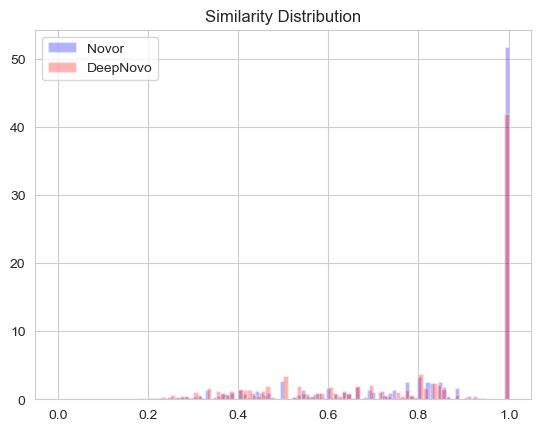

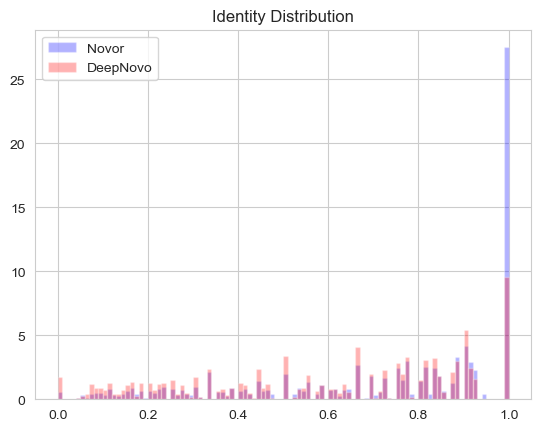

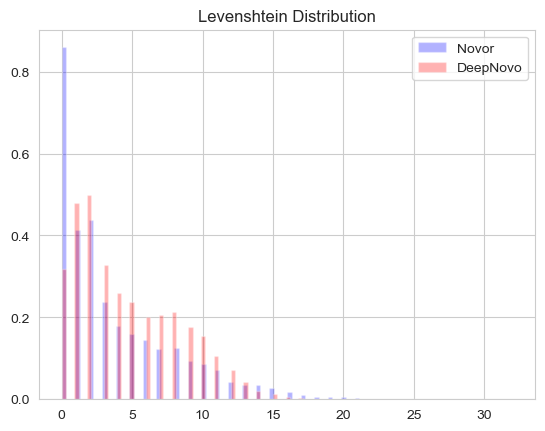

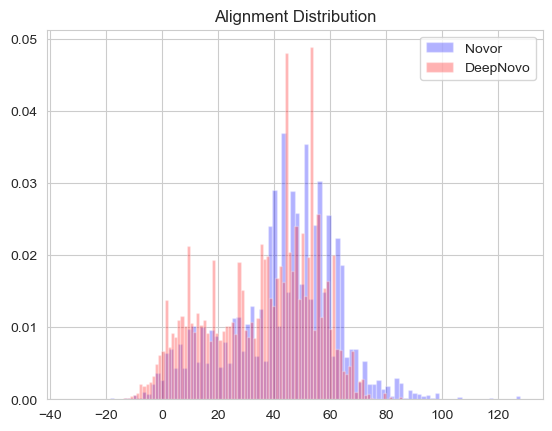

In [15]:
metrics = ['Similarity', 'Identity', 'Levenshtein', 'Alignment']
# read dataset
novor_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_Novor_1.tsv', sep='\t', index_col=0)
deepnovo_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_DeepNovo_1.tsv', sep='\t', index_col=0)
directTag_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_DirecTag_1.tsv', sep='\t', index_col=0)
for met in metrics:
    plt.figure()
    plt.hist(novor_df[met], bins=100, color='blue', alpha=0.3, label='Novor', density=True)
    plt.hist(deepnovo_df[met], bins=100, color='red', alpha=0.3, label='DeepNovo', density=True)
    #plt.hist(directTag_df[met], bins=100, color='green', alpha=0.3, label='DirectTag', density=True)
    plt.title(f'{met} Distribution')
    plt.legend()

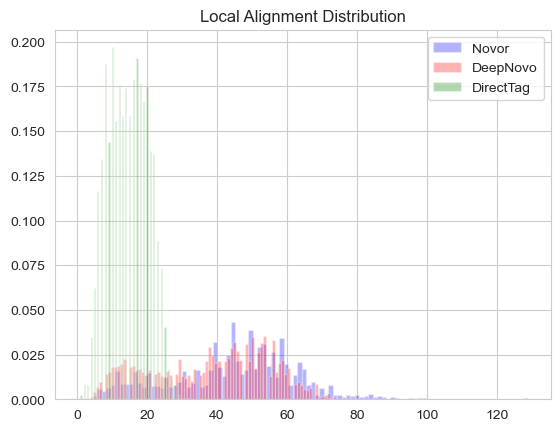

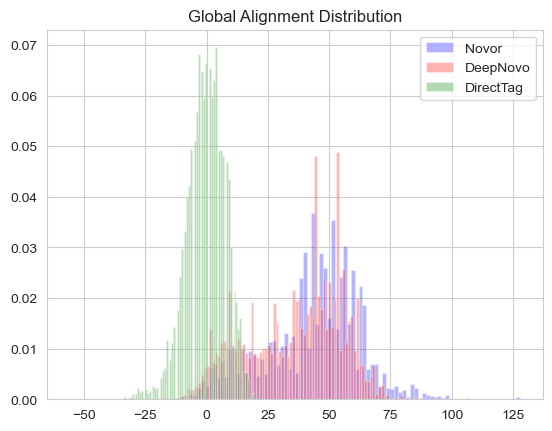

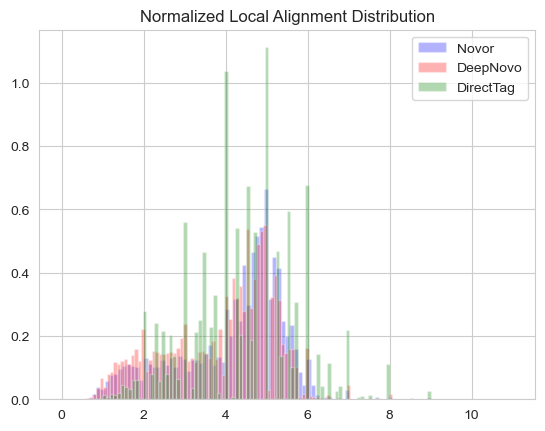

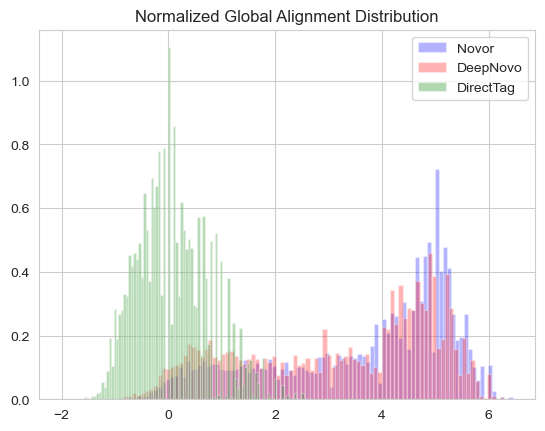

In [5]:
metrics = ['Local Alignment', 'Global Alignment', 'Normalized Local Alignment', 'Normalized Global Alignment']
novor_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_Novor_1.tsv', sep='\t', index_col=0)
deepnovo_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_DeepNovo_1.tsv', sep='\t', index_col=0)
directTag_df = pd.read_csv(f'/Users/lukas/University/Bachelor_Thesis/Project/PeptideDeNovoSequencing/Data/Result/Analysis_DirecTag_1.tsv', sep='\t', index_col=0)
for met in metrics:
    plt.figure()
    plt.hist(novor_df[met], bins=100, color='blue', alpha=0.3, label='Novor', density=True)
    plt.hist(deepnovo_df[met], bins=100, color='red', alpha=0.3, label='DeepNovo', density=True)
    plt.hist(directTag_df[met], bins=100, color='green', alpha=0.3, label='DirectTag', density=True)
    #plt.hist(directTag_df[met], bins=100, color='green', alpha=0.3, label='DirectTag', density=True)
    plt.title(f'{met} Distribution')
    plt.legend()